<a href="https://colab.research.google.com/github/Ruthuvikas/Beverage_Discount/blob/main/beverage_discount.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dataset

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
import numpy
import pandas
import matplotlib
import tqdm

!unzip -n /content/drive/MyDrive/beverage.zip
df = pandas.read_csv('synthetic_beverage_sales_data.csv')

Archive:  /content/drive/MyDrive/beverage.zip


In [36]:
df.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23


In [37]:
df.describe()

,Unit_Price,Quantity,Discount,Total_Price
count,8.999910e+06,8.999910e+06,8.999910e+06,8.999910e+06
mean,5.818037e+00,2.313813e+01,2.972879e-02,1.307437e+02
std,1.470050e+01,2.689321e+01,4.479841e-02,5.096947e+02
min,3.200000e-01,1.000000e+00,0.000000e+00,3.000000e-01
25%,1.050000e+00,6.000000e+00,0.000000e+00,8.400000e+00
50%,1.750000e+00,1.100000e+01,0.000000e+00,2.114000e+01
75%,3.210000e+00,3.000000e+01,5.000000e-02,6.949000e+01
max,1.695300e+02,1.000000e+02,1.500000e-01,1.429530e+04


Check for Duplicate rows

In [38]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)


Empty DataFrame
Columns: [Order_ID, Customer_ID, Customer_Type, Product, Category, Unit_Price, Quantity, Discount, Total_Price, Region, Order_Date]
Index: []


Check for NA values

In [39]:
print(f'Presence of NA values in the dataset : {df.isna().any().any()}')
print(f'Columns : {list(df.columns)}')

Presence of NA values in the dataset : False
Columns : ['Order_ID', 'Customer_ID', 'Customer_Type', 'Product', 'Category', 'Unit_Price', 'Quantity', 'Discount', 'Total_Price', 'Region', 'Order_Date']


Drop unnecessary colns

In [40]:
df = df.drop(['Order_ID', 'Customer_ID', 'Total_Price'], axis=1)

In [41]:
df.head()

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Region,Order_Date
0,B2B,Vio Wasser,Water,1.66,53,0.10,Baden-Württemberg,2023-08-23
1,B2B,Evian,Water,1.56,90,0.10,Baden-Württemberg,2023-08-23
2,B2B,Sprite,Soft Drinks,1.17,73,0.05,Baden-Württemberg,2023-08-23
3,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,Baden-Württemberg,2023-08-23
4,B2B,Gerolsteiner,Water,0.87,35,0.10,Baden-Württemberg,2023-08-23


Split Order date

In [42]:
df['Order_Date'] = pandas.to_datetime(df['Order_Date'])

# Extract features
df['Order_Year'] = df['Order_Date'].dt.year
df['Order_Month'] = df['Order_Date'].dt.month
df['Order_Day'] = df['Order_Date'].dt.day
df['Order_Weekday'] = df['Order_Date'].dt.weekday  # 0=Monday, 6=Sunday


In [43]:
df.head()

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Region,Order_Date,Order_Year,Order_Month,Order_Day,Order_Weekday
0,B2B,Vio Wasser,Water,1.66,53,0.10,Baden-Württemberg,2023-08-23,2023,8,23,2
1,B2B,Evian,Water,1.56,90,0.10,Baden-Württemberg,2023-08-23,2023,8,23,2
2,B2B,Sprite,Soft Drinks,1.17,73,0.05,Baden-Württemberg,2023-08-23,2023,8,23,2
3,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,Baden-Württemberg,2023-08-23,2023,8,23,2
4,B2B,Gerolsteiner,Water,0.87,35,0.10,Baden-Württemberg,2023-08-23,2023,8,23,2


In [44]:
df = df.drop(['Order_Date'], axis=1)

In [45]:
unique_customer_types = df['Customer_Type'].unique()
print(unique_customer_types)

['B2B' 'B2C']


In [46]:
customer_type_mapping = {'B2B': 0, 'B2C': 1}
df['Customer_Type'] = df['Customer_Type'].map(customer_type_mapping)

In [47]:
df.head()

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Region,Order_Year,Order_Month,Order_Day,Order_Weekday
0,0,Vio Wasser,Water,1.66,53,0.10,Baden-Württemberg,2023,8,23,2
1,0,Evian,Water,1.56,90,0.10,Baden-Württemberg,2023,8,23,2
2,0,Sprite,Soft Drinks,1.17,73,0.05,Baden-Württemberg,2023,8,23,2
3,0,Rauch Multivitamin,Juices,3.22,59,0.10,Baden-Württemberg,2023,8,23,2
4,0,Gerolsteiner,Water,0.87,35,0.10,Baden-Württemberg,2023,8,23,2


In [48]:
unique_product_types = df['Product'].unique()
print(unique_product_types)

product_type_mappings = {}
for i, product_type in enumerate(unique_product_types):
    product_type_mappings[product_type] = i
print(product_type_mappings)
df['Product'] = df['Product'].map(product_type_mappings)


['Vio Wasser' 'Evian' 'Sprite' 'Rauch Multivitamin' 'Gerolsteiner'
 'Sauvignon Blanc' 'Tomato Juice' 'Vittel' 'San Pellegrino' 'Mountain Dew'
 'Hohes C Orange' 'Red Bull' 'Chardonnay' 'Tanqueray' 'Rotkäppchen Sekt'
 'Mango Juice' 'Apollinaris' 'Riesling' 'Granini Apple' 'Fanta' 'Rockstar'
 'Club Mate' 'Krombacher' 'Erdinger Weißbier' 'Volvic Touch' 'Volvic'
 'Schwip Schwap' 'Fritz-Kola' 'Coca-Cola' 'Selters' 'Cranberry Juice'
 'Mezzo Mix' "Beck's" 'Passion Fruit Juice' 'Monster' 'Augustiner' 'Pepsi'
 'Merlot' 'Kölsch' 'Bacardi' 'Warsteiner' 'Moët & Chandon' 'Jever'
 'Veuve Clicquot' 'Johnnie Walker' 'Havana Club' 'Jack Daniels']
{'Vio Wasser': 0, 'Evian': 1, 'Sprite': 2, 'Rauch Multivitamin': 3, 'Gerolsteiner': 4, 'Sauvignon Blanc': 5, 'Tomato Juice': 6, 'Vittel': 7, 'San Pellegrino': 8, 'Mountain Dew': 9, 'Hohes C Orange': 10, 'Red Bull': 11, 'Chardonnay': 12, 'Tanqueray': 13, 'Rotkäppchen Sekt': 14, 'Mango Juice': 15, 'Apollinaris': 16, 'Riesling': 17, 'Granini Apple': 18, 'Fanta': 1

In [49]:
df.head()

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Region,Order_Year,Order_Month,Order_Day,Order_Weekday
0,0,0,Water,1.66,53,0.10,Baden-Württemberg,2023,8,23,2
1,0,1,Water,1.56,90,0.10,Baden-Württemberg,2023,8,23,2
2,0,2,Soft Drinks,1.17,73,0.05,Baden-Württemberg,2023,8,23,2
3,0,3,Juices,3.22,59,0.10,Baden-Württemberg,2023,8,23,2
4,0,4,Water,0.87,35,0.10,Baden-Württemberg,2023,8,23,2


In [50]:
unique_category_types = df['Category'].unique()
print(unique_category_types)

category_type_mappings = {}
for i, category_type in enumerate(unique_category_types):
    category_type_mappings[category_type] = i
print(category_type_mappings)
df['Category'] = df['Category'].map(category_type_mappings)


['Water' 'Soft Drinks' 'Juices' 'Alcoholic Beverages']
{'Water': 0, 'Soft Drinks': 1, 'Juices': 2, 'Alcoholic Beverages': 3}


In [51]:
unique_region_types = df['Region'].unique()
print(unique_region_types)

region_type_mappings = {}
for i, region_type in enumerate(unique_region_types):
    region_type_mappings[region_type] = i
print(region_type_mappings)
df['Region'] = df['Region'].map(region_type_mappings)

['Baden-Württemberg' 'Schleswig-Holstein' 'Hamburg' 'Bayern' 'Saarland'
 'Thüringen' 'Brandenburg' 'Nordrhein-Westfalen' 'Mecklenburg-Vorpommern'
 'Sachsen-Anhalt' 'Niedersachsen' 'Rheinland-Pfalz' 'Bremen' 'Sachsen'
 'Hessen' 'Berlin']
{'Baden-Württemberg': 0, 'Schleswig-Holstein': 1, 'Hamburg': 2, 'Bayern': 3, 'Saarland': 4, 'Thüringen': 5, 'Brandenburg': 6, 'Nordrhein-Westfalen': 7, 'Mecklenburg-Vorpommern': 8, 'Sachsen-Anhalt': 9, 'Niedersachsen': 10, 'Rheinland-Pfalz': 11, 'Bremen': 12, 'Sachsen': 13, 'Hessen': 14, 'Berlin': 15}


Add new Coln: Price after discount

In [52]:
# Add a new column for price per unit after discount
df['Price_After_Discount'] = df['Unit_Price'] * (1 - df['Discount'])


In [53]:
df.head()

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Region,Order_Year,Order_Month,Order_Day,Order_Weekday,Price_After_Discount
0,0,0,0,1.66,53,0.10,0,2023,8,23,2,1.4940
1,0,1,0,1.56,90,0.10,0,2023,8,23,2,1.4040
2,0,2,1,1.17,73,0.05,0,2023,8,23,2,1.1115
3,0,3,2,3.22,59,0.10,0,2023,8,23,2,2.8980
4,0,4,0,0.87,35,0.10,0,2023,8,23,2,0.7830


In [54]:

X = df.drop('Quantity', axis=1)
y = df['Quantity']

In [55]:
X.head()

,Customer_Type,Product,Category,Unit_Price,Discount,Region,Order_Year,Order_Month,Order_Day,Order_Weekday,Price_After_Discount
0,0,0,0,1.66,0.10,0,2023,8,23,2,1.4940
1,0,1,0,1.56,0.10,0,2023,8,23,2,1.4040
2,0,2,1,1.17,0.05,0,2023,8,23,2,1.1115
3,0,3,2,3.22,0.10,0,2023,8,23,2,2.8980
4,0,4,0,0.87,0.10,0,2023,8,23,2,0.7830


In [56]:
y.head()

,Quantity
0,53
1,90
2,73
3,59
4,35


In [57]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(7199928, 11) (1799982, 11)
(7199928,) (1799982,)


Setup a Baseline model: Linear Regression

Mean Squared Error (MSE): 231.35312610994993
R-squared (R²): 0.6803760827226218

Feature Importances (Coefficients):
                 Feature  Coefficient
4               Discount   425.093460
3             Unit_Price     0.851704
7            Order_Month     0.002393
5                 Region     0.001098
8              Order_Day     0.000747
9          Order_Weekday    -0.000732
6             Order_Year    -0.006114
1                Product    -0.010302
2               Category    -0.157030
10  Price_After_Discount    -0.836471
0          Customer_Type    -6.606158


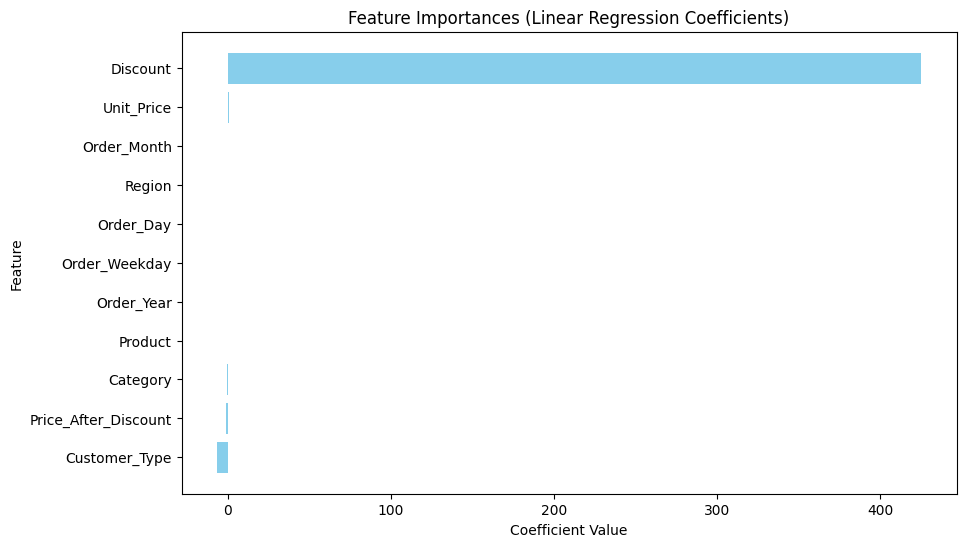

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Initialize the Linear Regression model
model = LinearRegression()

# Step 2: Fit the model to the training data
# X_train: Feature matrix for training
# y_train: Target variable for training
model.fit(X_train, y_train)

# Step 3: Make predictions on the test data
# X_test: Feature matrix for testing
y_pred = model.predict(X_test)

# Step 4: Evaluate the model
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared score (R²)
r2 = r2_score(y_test, y_pred)

# Step 5: Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

# Step 6: Get Feature Importance (Coefficients)
feature_names = X_train.columns  # Assuming X_train is a pandas DataFrame
coefficients = model.coef_  # Get the coefficients
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Print feature importance
print("\nFeature Importances (Coefficients):")
print(importance_df)

# Step 7: Visualize Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importances (Linear Regression Coefficients)')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


Ensemble Method: XGBoost

Mean Squared Error (MSE): 181.62985229492188
R-squared (R²): 0.7490707635879517

Feature Importances:
                 Feature  Importance
0          Customer_Type    0.890961
4               Discount    0.089266
2               Category    0.008828
3             Unit_Price    0.005043
10  Price_After_Discount    0.003085
1                Product    0.002320
6             Order_Year    0.000313
7            Order_Month    0.000063
9          Order_Weekday    0.000043
5                 Region    0.000039
8              Order_Day    0.000039


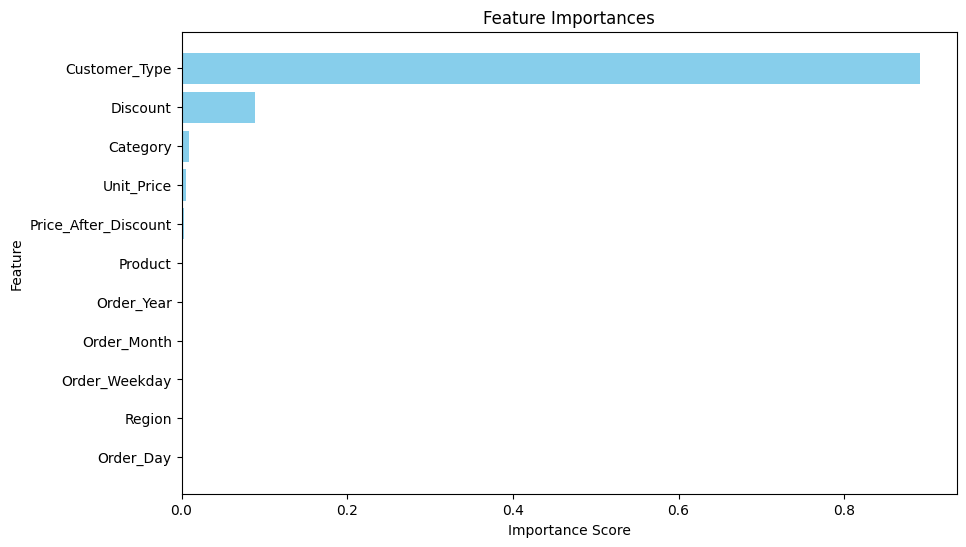

In [59]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Initialize the XGBoost Regressor model
model = XGBRegressor(objective="reg:squarederror", random_state=60)

# Step 2: Fit the model to the training data
# X_train: Feature matrix for training
# y_train: Target variable for training
model.fit(X_train, y_train)

# Step 3: Make predictions on the test data
# X_test: Feature matrix for testing
y_pred = model.predict(X_test)

# Step 4: Evaluate the model
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared score (R²)
r2 = r2_score(y_test, y_pred)

# Step 5: Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

# Step 6: Get Feature Importance
feature_importances = model.feature_importances_
feature_names = X_train.columns  # Assuming X_train is a pandas DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print feature importance
print("\nFeature Importances:")
print(importance_df)

# Step 7: Visualize Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


Random Forest

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Initialize the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=10, random_state=42)

# Step 2: Fit the model to the training data
# X_train: Feature matrix for training
# y_train: Target variable for training
model.fit(X_train, y_train)

# Step 3: Make predictions on the test data
# X_test: Feature matrix for testing
y_pred = model.predict(X_test)

# Step 4: Evaluate the model
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared score (R²)
r2 = r2_score(y_test, y_pred)

# Step 5: Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

# Step 6: Get Feature Importance
feature_names = X_train.columns  # Assuming X_train is a pandas DataFrame
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print feature importance
print("\nFeature Importances:")
print(importance_df)

# Step 7: Visualize Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importances (Random Forest)')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


Calculate best discount given the feature vector

In [ ]:
import numpy as np

# Function to predict quantity for varying discounts
def find_ideal_discount(model, customer_type, product, category, unit_price, region, max_discount=0.5):
    discounts = np.linspace(0, max_discount, 50)  # Discounts from 0% to 50%
    predicted_quantities = []

    for discount in discounts:
        features = np.array([[customer_type, product, category, unit_price, discount, region, unit_price * (1 - discount)]])
        predicted_quantity = model.predict(features)
        predicted_quantities.append(predicted_quantity[0])

    # Find the discount that maximizes quantity
    best_discount = discounts[np.argmax(predicted_quantities)]
    return best_discount, discounts, predicted_quantities

# Example usage
best_discount, discounts, predicted_quantities = find_ideal_discount(
    model,
    customer_type=1,  # Example input
    product=28,
    category=1,
    unit_price= 3,
    region=2
)

print(f"Ideal Discount: {best_discount}")
